In [1]:
import numpy as np
import operator

In [6]:
def creatDataSet():
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group,labels

In [26]:
def classify(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    diffMat=np.tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
#     print(distances)
    sortedDistIndices=distances.argsort()
#     print(sortedDistIndices)
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndices[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
#     print(sortedClassCount)
    return sortedClassCount[0][0]

In [27]:
group,labels=creatDataSet()
group,labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]), ['A', 'A', 'B', 'B'])

In [28]:
classify([0,0],group,labels,3)

[('B', 2), ('A', 1)]


'B'

In [33]:
def flie2matrix(filename):
    fr=open(filename)
    arrayOlines=fr.readlines()
    numberOfLines=len(arrayOlines)
    returnMat=np.zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in arrayOlines:
        line=line.strip()
        listFromline=line.split('\t')
        returnMat[index:]=listFromline[0:3]
        if listFromline[-1]=='didntLike':
            classLabelVector.append(1)
        elif listFromline[-1]=='smallDoses':
            classLabelVector.append(2)
        elif listFromline[-1]=='largeDoses':
            classLabelVector.append(3)
        index+=1
    return returnMat,classLabelVector

In [39]:
filename='datingTestSet.txt'
datingDataMat,datingLables=flie2matrix(filename)
print(datingDataMat.shape)
print(len(datingLables))

(1000, 3)
1000


In [40]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def showdatas(datingDataMat,datingLables):
    font=FontProperties(fname=r'c:\windows\fonts\simsun.ttc',size=14)
    fig,axs=plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(13,8))
    
    numberOfLabels=len(datingLables)
    LabelsColors=[]
    for i in datingLables:
        if i==1:
            LabelsColors.append('black')
        if i==2:
            LabelsColors.append('orange')
        if i==3:
            LabelsColors.append('red')
    
    axs[0][0].scatter(x=datingDataMat[:,0],y=datingDataMat[:,1],color=LabelsColors,s=15,alpha=.5)
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
    
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black') 
    
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])

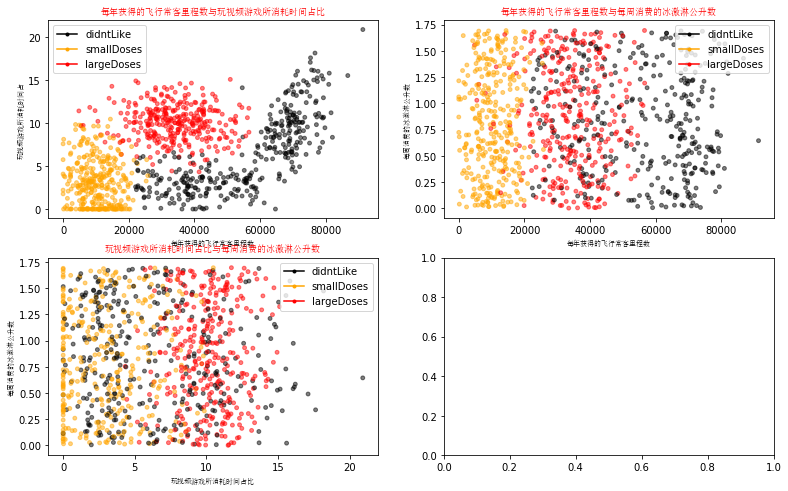

In [44]:
showdatas(datingDataMat,datingLables)

In [47]:
def autoNorm(dataSet):
    minvals=dataSet.min(0)
    maxvals=dataSet.max(0)
    ranges=maxvals-minvals
    normDataSet=np.zeros(np.shape(dataSet))
    m=dataSet.shape[0]
    normDataSet=dataSet-np.tile(minvals,(m,1))
    normDataSet=normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minvals

In [49]:
normDataSet,ranges,minvals=autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minvals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


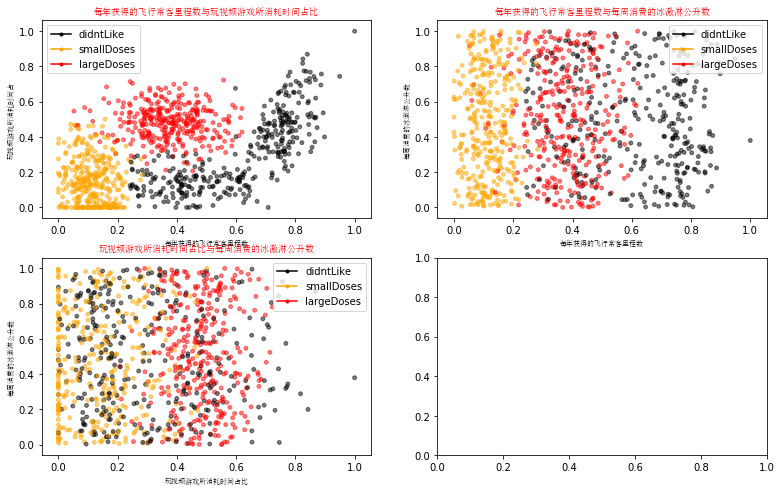

In [50]:
showdatas(normDataSet,datingLables)

In [56]:
def datingClassTest():
    filename='datingTestSet.txt'
    datingDateMat,datingLabels=flie2matrix(filename)
    hoRatio=0.10
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    
    for i in range(numTestVecs):
        classifierResult=classify(normMat[i,:],normMat[numTestVecs:m,:],datingLables[numTestVecs:m],4)
        
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult!=datingLables[i]:
            errorCount+=1.0
        print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

In [57]:
datingClassTest()

[(3, 4)]
分类结果:3	真实类别:3
错误率:0.000000%
[(2, 2), (3, 2)]
分类结果:2	真实类别:2
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(3, 3), (1, 1)]
分类结果:3	真实类别:3
错误率:0.000000%
[(3, 4)]
分类结果:3	真实类别:3
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(3, 4)]
分类结果:3	真实类别:3
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(2, 4)]
分类结果:2	真实类别:2
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(2, 4)]
分类结果:2	真实类别:2
错误率:0.000000%
[(3, 4)]
分类结果:3	真实类别:3
错误率:0.000000%
[(2, 4)]
分类结果:2	真实类别:2
错误率:0.000000%
[(1, 4)]
分类结果:1	真实类别:1
错误率:0.000000%
[(2, 2), (3, 1), (1, 1)]
分类结果:2	真实类别:2
错误率:0.000000%
[(3, 3), (1, 1)]
分类结果:3	真实类别:3
错误率:0.000000%
[(2, 4)]
分类结果:2	真实类别:2
错误率:0.000000%
[(3, 4)]
分类结果:3	真实类别:3
错误率:0.000000

In [66]:
def classifyPerson():
    resultList=['讨厌','有些喜欢','非常喜欢']
    
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    
    filename='datingTestSet.txt'
    datingDateMat,datingLabels=flie2matrix(filename)
    normMat,ranges,minVals=autoNorm(datingDataMat)
    
    inArr=np.array([precentTats,ffMiles,iceCream])
    norminArr=(inArr-minVals)/ranges
    classifierResult=classify(norminArr,normMat,datingLables,3)
    print(classifierResult)
    print("你可能%s这个人" % (resultList[classifierResult-1]))

In [67]:
classifyPerson()

玩视频游戏所耗时间百分比:1
每年获得的飞行常客里程数:1
每周消费的冰激淋公升数:1
[(2, 3)]
2
你可能有些喜欢这个人


In [68]:
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

In [69]:
def img2vector(filename):
    returnVec=np.zeros((1,1024))
    fr=open(filename)
    for i in range(32):
        lineStr=fr.readline()
        for j in range(32):
            returnVec[0,32*i+j]=int(lineStr)
    return returnVec

In [72]:
def handwritingClassTest():
    hwLabels=[]
    trainingFieList=listdir('trainingDigits')
    m=len(trainingFieList)
    trainingMat=np.zeros((m,1024))
    for i in range(m):
        fileNameStr=trainingFieList[i]
        classNumber=int(fileNameStr.split('_')[0])
        hwLabels.append(classNumber)
        trainingMat[i,:]=img2vector('trainingDigits/%s' % (fileNameStr))
    testFileList=listdir('testDigits')
    errorCount=0.0
    mTest=len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [73]:
handwritingClassTest()

[(0, 3)]
the classifier came back with: 0, the real answer is: 0
[(1, 1), (0, 1), (6, 1)]
the classifier came back with: 1, the real answer is: 0
[(6, 2), (0, 1)]
the classifier came back with: 6, the real answer is: 0
[(0, 1), (6, 1), (1, 1)]
the classifier came back with: 0, the real answer is: 0
[(0, 2), (5, 1)]
the classifier came back with: 0, the real answer is: 0
[(0, 3)]
the classifier came back with: 0, the real answer is: 0
[(6, 1), (0, 1), (1, 1)]
the classifier came back with: 6, the real answer is: 0
[(0, 2), (1, 1)]
the classifier came back with: 0, the real answer is: 0
[(4, 2), (1, 1)]
the classifier came back with: 4, the real answer is: 0
[(0, 3)]
the classifier came back with: 0, the real answer is: 0
[(5, 2), (0, 1)]
the classifier came back with: 5, the real answer is: 0
[(0, 2), (6, 1)]
the classifier came back with: 0, the real answer is: 0
[(6, 3)]
the classifier came back with: 6, the real answer is: 0
[(6, 3)]
the classifier came back with: 6, the real answer 

the classifier came back with: 3, the real answer is: 1
[(1, 2), (9, 1)]
the classifier came back with: 1, the real answer is: 1
[(2, 1), (5, 1), (3, 1)]
the classifier came back with: 2, the real answer is: 1
[(7, 2), (2, 1)]
the classifier came back with: 7, the real answer is: 1
[(6, 1), (0, 1), (4, 1)]
the classifier came back with: 6, the real answer is: 1
[(8, 2), (5, 1)]
the classifier came back with: 8, the real answer is: 1
[(1, 2), (9, 1)]
the classifier came back with: 1, the real answer is: 1
[(1, 3)]
the classifier came back with: 1, the real answer is: 1
[(1, 3)]
the classifier came back with: 1, the real answer is: 1
[(4, 1), (1, 1), (9, 1)]
the classifier came back with: 4, the real answer is: 1
[(7, 2), (1, 1)]
the classifier came back with: 7, the real answer is: 1
[(3, 2), (1, 1)]
the classifier came back with: 3, the real answer is: 1
[(9, 3)]
the classifier came back with: 9, the real answer is: 1
[(1, 2), (7, 1)]
the classifier came back with: 1, the real answer i

the classifier came back with: 2, the real answer is: 2
[(8, 1), (2, 1), (9, 1)]
the classifier came back with: 8, the real answer is: 2
[(8, 2), (9, 1)]
the classifier came back with: 8, the real answer is: 2
[(5, 1), (8, 1), (9, 1)]
the classifier came back with: 5, the real answer is: 2
[(3, 3)]
the classifier came back with: 3, the real answer is: 2
[(3, 2), (8, 1)]
the classifier came back with: 3, the real answer is: 2
[(3, 1), (5, 1), (2, 1)]
the classifier came back with: 3, the real answer is: 2
[(3, 2), (5, 1)]
the classifier came back with: 3, the real answer is: 2
[(9, 2), (5, 1)]
the classifier came back with: 9, the real answer is: 2
[(7, 1), (9, 1), (2, 1)]
the classifier came back with: 7, the real answer is: 2
[(8, 1), (9, 1), (5, 1)]
the classifier came back with: 8, the real answer is: 2
[(2, 2), (9, 1)]
the classifier came back with: 2, the real answer is: 2
[(3, 1), (2, 1), (8, 1)]
the classifier came back with: 3, the real answer is: 2
[(2, 2), (9, 1)]
the classif

the classifier came back with: 3, the real answer is: 3
[(3, 2), (1, 1)]
the classifier came back with: 3, the real answer is: 3
[(5, 1), (1, 1), (7, 1)]
the classifier came back with: 5, the real answer is: 3
[(3, 2), (8, 1)]
the classifier came back with: 3, the real answer is: 3
[(3, 1), (7, 1), (2, 1)]
the classifier came back with: 3, the real answer is: 3
[(3, 2), (2, 1)]
the classifier came back with: 3, the real answer is: 3
[(8, 1), (3, 1), (2, 1)]
the classifier came back with: 8, the real answer is: 3
[(3, 1), (9, 1), (2, 1)]
the classifier came back with: 3, the real answer is: 3
[(2, 1), (8, 1), (9, 1)]
the classifier came back with: 2, the real answer is: 3
[(3, 3)]
the classifier came back with: 3, the real answer is: 3
[(7, 1), (2, 1), (3, 1)]
the classifier came back with: 7, the real answer is: 3
[(3, 3)]
the classifier came back with: 3, the real answer is: 3
[(9, 2), (3, 1)]
the classifier came back with: 9, the real answer is: 3
[(3, 3)]
the classifier came back wi

the classifier came back with: 4, the real answer is: 4
[(4, 2), (7, 1)]
the classifier came back with: 4, the real answer is: 4
[(1, 2), (4, 1)]
the classifier came back with: 1, the real answer is: 4
[(9, 1), (1, 1), (5, 1)]
the classifier came back with: 9, the real answer is: 4
[(4, 3)]
the classifier came back with: 4, the real answer is: 4
[(2, 2), (9, 1)]
the classifier came back with: 2, the real answer is: 4
[(2, 1), (3, 1), (9, 1)]
the classifier came back with: 2, the real answer is: 4
[(5, 1), (9, 1), (1, 1)]
the classifier came back with: 5, the real answer is: 4
[(9, 1), (2, 1), (8, 1)]
the classifier came back with: 9, the real answer is: 4
[(7, 1), (1, 1), (5, 1)]
the classifier came back with: 7, the real answer is: 4
[(9, 3)]
the classifier came back with: 9, the real answer is: 4
[(8, 2), (9, 1)]
the classifier came back with: 8, the real answer is: 4
[(4, 3)]
the classifier came back with: 4, the real answer is: 4
[(9, 1), (7, 1), (1, 1)]
the classifier came back wi

the classifier came back with: 8, the real answer is: 5
[(9, 1), (5, 1), (8, 1)]
the classifier came back with: 9, the real answer is: 5
[(9, 2), (5, 1)]
the classifier came back with: 9, the real answer is: 5
[(9, 2), (5, 1)]
the classifier came back with: 9, the real answer is: 5
[(3, 1), (7, 1), (8, 1)]
the classifier came back with: 3, the real answer is: 5
[(5, 1), (2, 1), (9, 1)]
the classifier came back with: 5, the real answer is: 5
[(3, 1), (8, 1), (9, 1)]
the classifier came back with: 3, the real answer is: 5
[(3, 3)]
the classifier came back with: 3, the real answer is: 5
[(6, 2), (1, 1)]
the classifier came back with: 6, the real answer is: 5
[(9, 1), (2, 1), (8, 1)]
the classifier came back with: 9, the real answer is: 5
[(8, 2), (9, 1)]
the classifier came back with: 8, the real answer is: 5
[(3, 1), (5, 1), (2, 1)]
the classifier came back with: 3, the real answer is: 5
[(2, 1), (8, 1), (9, 1)]
the classifier came back with: 2, the real answer is: 5
[(5, 2), (9, 1)]
the

the classifier came back with: 6, the real answer is: 7
[(7, 2), (4, 1)]
the classifier came back with: 7, the real answer is: 7
[(7, 3)]
the classifier came back with: 7, the real answer is: 7
[(1, 2), (3, 1)]
the classifier came back with: 1, the real answer is: 7
[(3, 3)]
the classifier came back with: 3, the real answer is: 7
[(7, 3)]
the classifier came back with: 7, the real answer is: 7
[(1, 2), (5, 1)]
the classifier came back with: 1, the real answer is: 7
[(2, 1), (7, 1), (9, 1)]
the classifier came back with: 2, the real answer is: 7
[(9, 2), (7, 1)]
the classifier came back with: 9, the real answer is: 7
[(7, 2), (2, 1)]
the classifier came back with: 7, the real answer is: 7
[(7, 3)]
the classifier came back with: 7, the real answer is: 7
[(7, 3)]
the classifier came back with: 7, the real answer is: 7
[(5, 1), (2, 1), (7, 1)]
the classifier came back with: 5, the real answer is: 7
[(7, 2), (4, 1)]
the classifier came back with: 7, the real answer is: 7
[(6, 2), (8, 1)]
th

the classifier came back with: 3, the real answer is: 8
[(1, 2), (8, 1)]
the classifier came back with: 1, the real answer is: 8
[(8, 2), (5, 1)]
the classifier came back with: 8, the real answer is: 8
[(9, 2), (5, 1)]
the classifier came back with: 9, the real answer is: 8
[(5, 1), (8, 1), (9, 1)]
the classifier came back with: 5, the real answer is: 8
[(8, 3)]
the classifier came back with: 8, the real answer is: 8
[(6, 2), (3, 1)]
the classifier came back with: 6, the real answer is: 8
[(5, 1), (1, 1), (8, 1)]
the classifier came back with: 5, the real answer is: 8
[(9, 1), (7, 1), (0, 1)]
the classifier came back with: 9, the real answer is: 8
[(2, 1), (5, 1), (9, 1)]
the classifier came back with: 2, the real answer is: 8
[(9, 3)]
the classifier came back with: 9, the real answer is: 8
[(1, 1), (5, 1), (8, 1)]
the classifier came back with: 1, the real answer is: 8
[(1, 1), (6, 1), (3, 1)]
the classifier came back with: 1, the real answer is: 8
[(2, 1), (5, 1), (8, 1)]
the classif

the classifier came back with: 8, the real answer is: 9
[(9, 3)]
the classifier came back with: 9, the real answer is: 9
[(1, 1), (7, 1), (9, 1)]
the classifier came back with: 1, the real answer is: 9
[(9, 1), (8, 1), (2, 1)]
the classifier came back with: 9, the real answer is: 9
[(3, 2), (7, 1)]
the classifier came back with: 3, the real answer is: 9
[(7, 2), (3, 1)]
the classifier came back with: 7, the real answer is: 9
[(5, 2), (9, 1)]
the classifier came back with: 5, the real answer is: 9
[(2, 1), (9, 1), (8, 1)]
the classifier came back with: 2, the real answer is: 9
[(5, 1), (9, 1), (8, 1)]
the classifier came back with: 5, the real answer is: 9
[(8, 1), (9, 1), (4, 1)]
the classifier came back with: 8, the real answer is: 9
[(1, 1), (7, 1), (9, 1)]
the classifier came back with: 1, the real answer is: 9
[(9, 2), (8, 1)]
the classifier came back with: 9, the real answer is: 9
[(8, 2), (5, 1)]
the classifier came back with: 8, the real answer is: 9
[(2, 2), (9, 1)]
the classif

In [86]:
def handwritingClassTest1():
    hwLabels=[]
    trainingFieList=listdir('trainingDigits')
    m=len(trainingFieList)
    trainingMat=np.zeros((m,1024))
    for i in range(m):
        fileNameStr=trainingFieList[i]
        classNumber=int(fileNameStr.split('_')[0])
#         print(classNumber)
        hwLabels.append(classNumber)
#         print(hwLabels)
        trainingMat[i,:]=img2vector('trainingDigits/%s' % (fileNameStr))
    neigh=kNN(n_neighbors=3,algorithm='auto')
    neigh.fit(trainingMat,hwLabels)
    testFileList=listdir('testDigits')
    errorCount=0.0
    mTest=len(testFileList)
    for i in range(mTest):
        fileNameStr=testFileList[i]
        classNumber=int(fileNameStr.split('_')[0])
        vectorUnderTest=img2vector('testDigits/%s' % (fileNameStr))
        classifierReslut=neigh.predict(vectorUnderTest)
        print("分类返回结果为%d\t真实结果为%d" % (classifierReslut, classNumber))
        if (classifierReslut != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

In [87]:
handwritingClassTest1()

分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为4	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为5	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为0
分类返回结果为9	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为4	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为5	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为5	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为4	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为4	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为0
分类返回结果为1	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为5	真实结果为0
分类返回结果为1	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为6	真实结果为0
分类返回结果为6

分类返回结果为6	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为0	真实结果为5
分类返回结果为0	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为8	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为0	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为0	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为3	真实结果为5
分类返回结果为6	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为8	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为0	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为0	真实结果为5
分类返回结果为1	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为9	真实结果为5
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为0	真实结果为6
分类返回结果为0	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为6